# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here. 
import pandas as pd
import numpy as np
student_data = pd.DataFrame({'X':[17,51,27,21,36,48,19,26,54,30],'Y':[10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

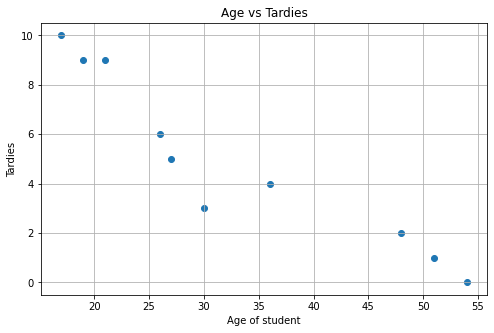

In [6]:
# Your code here.
x = student_data['X']
y = student_data['Y']
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(x,y)
ax.set(title='Age vs Tardies',xlabel='Age of student',ylabel='Tardies')
plt.grid()
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [108]:
# Your response here. 
print('Yes, there is a relationship between age of student and tardies, if while age it is more greater the tardies are less')

Yes, there is a relationship between age of student and tardies, if while age it is more greater the tardies are less


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Covariaze = -41.010000000000005, r = -0.9391626886887122


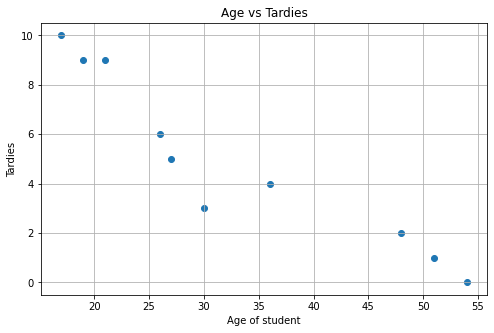

In [109]:
# Your response here.
import numpy as np
x_mean = x.mean()
y_mean = y.mean()
x_var = np.var(x)
y_var = np.var(y)
x_xmean = x-x_mean
y_ymean = y-y_mean

cov = sum(x_xmean*y_ymean) / len(student_data)
r = sum(x_xmean*y_ymean)/(sum(x_xmean**2)*sum(y_ymean**2))**(1/2)

print(f'Covariaze = {cov}, r = {r}')
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(x,y)
ax.set(title='Age vs Tardies',xlabel='Age of student',ylabel='Tardies')
plt.grid()
plt.show()

In [99]:
print('There is negative covariance and correlation, so the students has fewer tardies as age increase ')

There is negative covariance and correlation, so the students has fewer tardies as age increase 


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [103]:
# Your response here.
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

x = sm.add_constant(x)

modelo = sm.OLS(y,x).fit()

modelo.summary()


/usr/lib64/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           5.57e-05
Time:                        20:08:42   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

Covariaze = -41.010000000000005, r = -0.9391626886887122


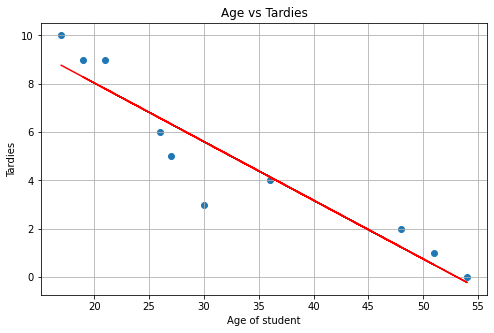

In [112]:
# Your code here.
print(f'Covariaze = {cov}, r = {r}')
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(x,y)
ax.set(title='Age vs Tardies',xlabel='Age of student',ylabel='Tardies')
ax.plot(x,12.8888 + x*-0.2428,color='red')
plt.grid()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [115]:
# Your response here. 
print('This is a good linear regression since the R squarde is 0.88 and f statistic is adequate, so the dependent variable explains the behavior of the independent variable very well.')

This is a good linear regression since the R squarde is 0.88 and f statistic is adequate, so the dependent variable explains the behavior of the independent variable very well.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

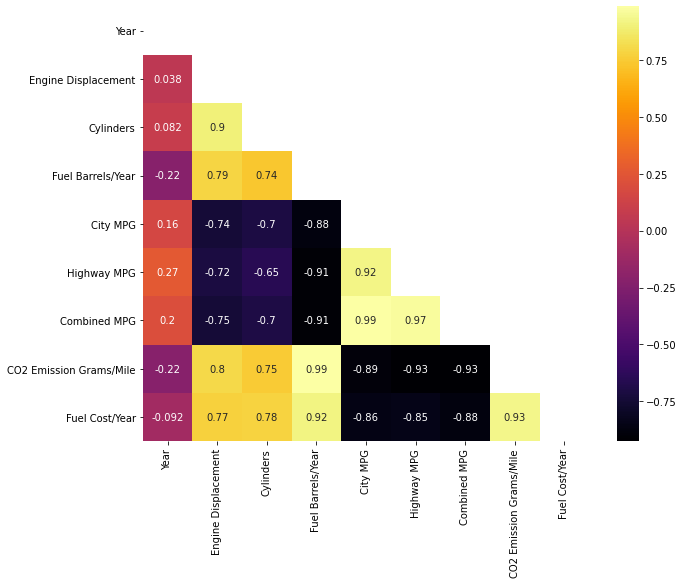

In [8]:
# Your response here. 
df = pd.read_csv('vehicles.csv')
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='inferno',annot=True, mask=mask)

In [9]:
print('There is a positive strong correlation between CO2 Emission Grams/Mile and Fuel Barrels/Year')
print('Also there is a negative strong correlation between CO2 Emission Grams/Mile and Highway MPG and Combined MPG')

There is a positive strong correlation between CO2 Emission Grams/Mile and Fuel Barrels/Year
Also there is a negative strong correlation between CO2 Emission Grams/Mile and Highway MPG and Combined MPG


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [11]:
# Your response here. 
y = df['CO2 Emission Grams/Mile']
x1 = df['Year']
x2 = df['Cylinders']
x3 = df['Fuel Barrels/Year']
x4 = df['Fuel Cost/Year']


In [35]:
X_s = [x1,x2,x3,x4]

for i in X_s:
    linreg = linregress(i,y)
    print('Linear regression with x as',i.name,':','\n')
    print(linreg,'\n')

Linear regression with x as Year : 

LinregressResult(slope=-2.6243334399528195, intercept=5725.863290704891, rvalue=-0.22229960295054232, pvalue=0.0, stderr=0.06070519740063001, intercept_stderr=121.45542700554039) 

Linear regression with x as Cylinders : 

LinregressResult(slope=51.0351851659482, intercept=181.09463563556636, rvalue=0.7523925537297491, pvalue=0.0, stderr=0.23565318220650086, intercept_stderr=1.420130194419671) 

Linear regression with x as Fuel Barrels/Year : 

LinregressResult(slope=26.28362539747029, intercept=12.486520830756774, rvalue=0.9861886621428736, pvalue=0.0, stderr=0.023281123789226775, intercept_stderr=0.4229449760692669) 

Linear regression with x as Fuel Cost/Year : 

LinregressResult(slope=0.21861650771613902, intercept=61.56307241317222, rvalue=0.9308651512201841, pvalue=0.0, stderr=0.00045255483993026806, intercept_stderr=0.8866990545646439) 



In [36]:
print('There are two variables that are highly correlated with CO2 Emission Grams / Mile, I would use a multiple linear regression because the "Fuel Barrels / Year" and "Fuel Cost / Year" variables can explain the behavior of CO2 emissions according to their statistical characteristics.')

There are two variables that are highly correlated with CO2 Emission Grams / Mile, I would use a multiple linear regression because the "Fuel Barrels / Year" and "Fuel Cost / Year" variables can explain the behavior of CO2 emissions according to their statistical characteristics.


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [44]:
# Your response here. 
X = sm.add_constant(pd.concat([x3,x4],axis=1))
modelo = sm.OLS(y,X).fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.977
Model:                                 OLS   Adj. R-squared:                  0.977
Method:                      Least Squares   F-statistic:                 7.708e+05
Date:                     Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                             22:59:46   Log-Likelihood:            -1.5487e+05
No. Observations:                    35952   AIC:                         3.098e+05
Df Residuals:                        35949   BIC:                         3.098e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [45]:
print('This linear regression has a higher efficiency when the regression is carried out on the two variables, since if the regression is done with respect to a dependent variable, the R squared would also be high, but when the multiple linear regression is carried out, the R squared increases a little bit.')

This linear regression has a higher efficiency when the regression is carried out on the two variables, since if the regression is done with respect to a dependent variable, the R squared would also be high, but when the multiple linear regression is carried out, the R squared increases a little bit.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [46]:
# Your code here. 
df = pd.DataFrame({
    'x':[1,3,4,6,8,9,11,14],
    'y':[1,2,4,4,5,7,8,13]
})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Covariaze = 11.2, r = 0.9652303546573691


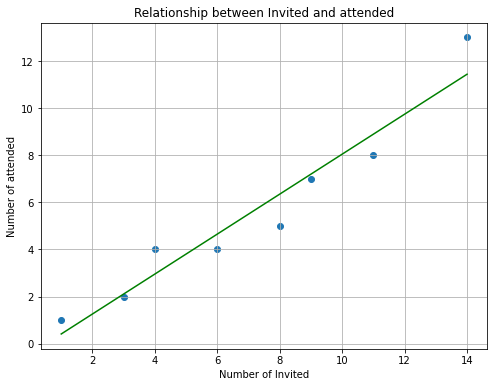

In [60]:
# Your code here.
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

x_mean = x.mean()
y_mean = y.mean()
x_var = np.var(x)
y_var = np.var(y)
x_xmean = x-x_mean
y_ymean = y-y_mean

cov = sum(x_xmean*y_ymean) / len(student_data)
r = sum(x_xmean*y_ymean)/(sum(x_xmean**2)*sum(y_ymean**2))**(1/2)

print(f'Covariaze = {cov}, r = {r}')

x=df['x']
y=df['y']
linear_model = linregress(x,y)
m = linear_model[0]
b = linear_model[1]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(x,m*x + b,color='green')
plt.title('Relationship between Invited and attended')
plt.xlabel('Number of Invited')
plt.ylabel('Number of attended')
plt.grid()
plt.show()


In [56]:
linear_model

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217, intercept_stderr=0.7592153973608793)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [62]:
# Your response here. 
print(linear_model)
print('\nThe variables have a positive correlation, so the initial assumption that the greater the number of guests at a party, the fewer the number of people will attend, the linear regression says otherwise')

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217, intercept_stderr=0.7592153973608793)

The variables have a positive correlation, so the initial assumption that the greater the number of guests at a party, the fewer the number of people will attend, the linear regression says otherwise


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

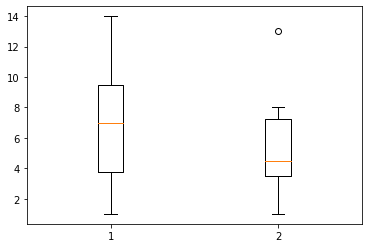

In [73]:
plt.boxplot([x,y])
plt.show()

In [75]:
y

0     1
1     2
2     4
3     4
4     5
5     7
6     8
7    13
Name: y, dtype: int64

Covariaze = 5.2, correlation = 0.971278116825086


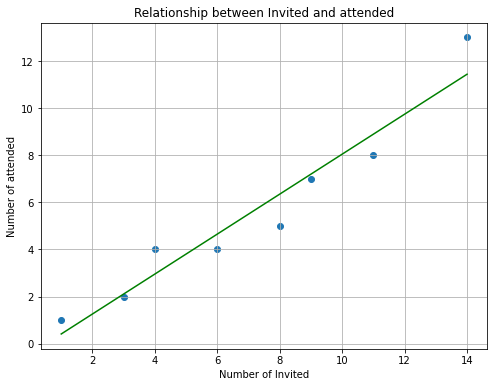

In [77]:
# Your response here. 
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
x = x[:-1]
y = y[:-1]
x_mean = x.mean()
y_mean = y.mean()
x_var = np.var(x)
y_var = np.var(y)
x_xmean = x-x_mean
y_ymean = y-y_mean

cov = sum(x_xmean*y_ymean) / len(student_data)
r = sum(x_xmean*y_ymean)/(sum(x_xmean**2)*sum(y_ymean**2))**(1/2)

print(f'Covariaze = {cov}, correlation = {r}')

x=df['x']
y=df['y']
linear_model = linregress(x,y)
m = linear_model[0]
b = linear_model[1]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.plot(x,m*x + b,color='green')
plt.title('Relationship between Invited and attended')
plt.xlabel('Number of Invited')
plt.ylabel('Number of attended')
plt.grid()
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [78]:
# Your response here. 
print('There is no significant change when removing the outlier value, the data still has a positive correlation')

There is no significant change when removing the outlier value, the data still has a positive correlation
